# Analyzing Individual Feature Patterns using Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# read out saved cleaned data
df = pd.read_csv("clean_autos.csv")

In [2]:
#check if reading wwent well
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,std,turbo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


First question is: what visualization method should I use?
<br>
It depends on data type we are dealing with.

In [3]:
# check types of data in df
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
std                    int64
turbo                  int64
dtype: object

In [4]:
# check correation (pearson correlation)
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


In [5]:
# to narrow dawn searches we can
# point data we are intrested in
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


## Continues variables
We are going to analyze linear relationships beetwen continous data (type float64).
<br>
We can gess that predicator of car price is his engine size.

In [6]:
# we can notice strong correlation
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='engine-size', ylabel='price'>

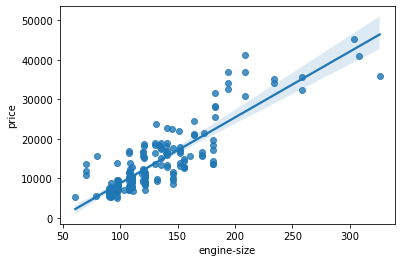

In [7]:
# we use sns regression model
# to plot data with fitted reg_model
sns.regplot(x="engine-size",y="price",data=df)

It is resonable to say that with incrising engine-size the price also goes up! We call it Positive lienar relationship. Lets check if there are others featurs with strong correlation.

In [8]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


This time we see that corrilation is absolutley near 1 but is negative. Which indicates Negative lienar relationship.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

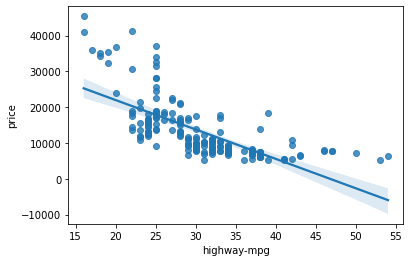

In [9]:
sns.regplot(x="highway-mpg", y="price",data=df)

As the fuel consumption goes up, the price for a car is less.
<br>Lets see weak lienar relationship. For example lets compare 'peak-rpm','price'.

In [10]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

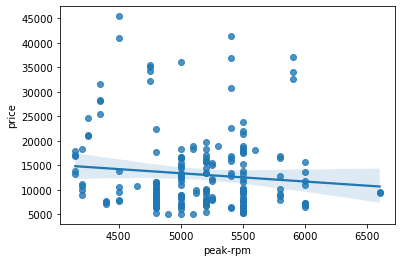

In [11]:
sns.regplot(x="peak-rpm", y="price", data=df)

Data is far scattered from fitted line. As well we see that correlation is absolutely near 0.

## Categorical Variables (descrite variables)
Those variables can have type object or int64. Lets find all ours categorical type columns.


In [12]:
# Select columns with int64 dtype
int_cols = df.dtypes.loc[df.dtypes == 'int64'].index
obj_cols = df.dtypes.loc[df.dtypes == 'object'].index
# Subset DataFrame to include only int64 columns
df_int = df[int_cols]
df_obj = df[obj_cols]
print(df_int.dtypes)
print(df_obj.dtypes)

symboling            int64
normalized-losses    int64
curb-weight          int64
engine-size          int64
horsepower           int64
city-mpg             int64
highway-mpg          int64
fuel-type-diesel     int64
fuel-type-gas        int64
std                  int64
turbo                int64
dtype: object
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
engine-type          object
num-of-cylinders     object
fuel-system          object
horsepower-binned    object
dtype: object


Lets analyze for example relationship between body-style and price.

<AxesSubplot:xlabel='body-style', ylabel='price'>

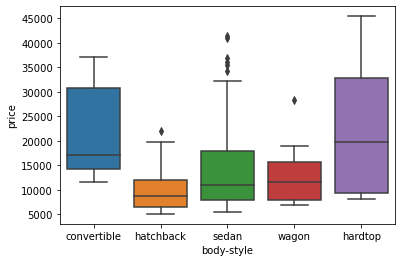

In [13]:
sns.boxplot(x="body-style",y="price",data=df)

In [14]:
df["engine-location"].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

<AxesSubplot:xlabel='engine-location', ylabel='price'>

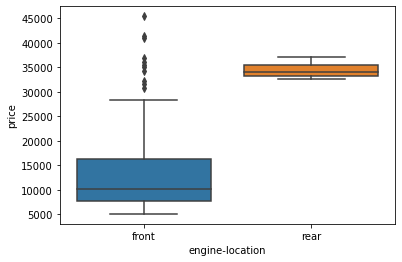

In [15]:
sns.boxplot(x="engine-location",y="price",data=df)

Lets last analyze drive-wheels to price.

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

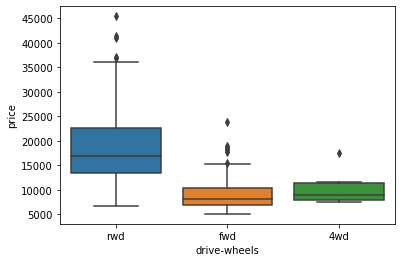

In [16]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

## Descriptive Statistical Analysis
<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [17]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std,turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [18]:
df.describe(include=["object"])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8,3
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,181,165,115,94,118,198,145,157,92,153


In [19]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

<p>Convert above result to a frame</p>

In [20]:
df["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [21]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [22]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


<p>Low value counts in engine-location indicate that this might not be the best predicator.</p>
<p>So for further analysis we are more conviced to take drive-wheels</p>

<h2> Basics of Grouping </h2>

In [23]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>Above example shows that we could group drive-wheels into 3 different categories.</p>
<p>We can also take columns form original df and create new for further analysis.</p>

In [24]:
df_group_one = df[["drive-wheels","body-style","price"]]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


<p>We can calculate the average price for each of different categories</p>

In [25]:
df_group_one = df_group_one.groupby(["drive-wheels"],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>We can group by multiple variables. For example:</>

In [26]:
df_gp = df[["drive-wheels","body-style","price"]]
df_gptest = df_gp.groupby(["drive-wheels","body-style"],as_index=False).mean()
df_gptest

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [27]:
# we can transpose above result
grouped_pivot = df_gptest.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [28]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

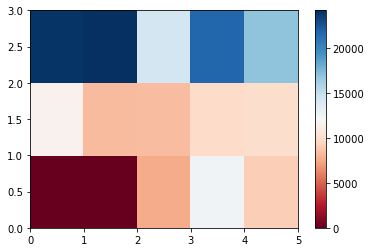

In [29]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

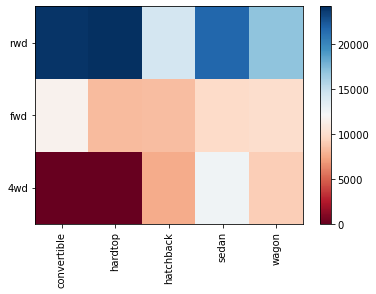

In [30]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2>Correlation and Causation</h2>
<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>
<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


In [31]:
# in pandas we can simply caclulate
# pearson correlation by
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>
<p>We can obtain this information using "stats" in scipy lib</p>

In [32]:
from scipy import stats

<b>Example</b>
<p>Let's check Pearson correlation and p-value of wheel-base and price in df.</p>

In [34]:
pearson_coef, p_value = stats.pearsonr(df["wheel-base"],df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732873e-20


<b>Conclusion</b>
<p>P-value up here is very low $< 0.001 \rightarrow$ wheel-base and price is statisticaly significant </p>
<p>Prearson correlation is $\approx 0.58$ so this indicates not strong (moderate) linear relationship.</p>
We will that linear relationship is stron if preason_coef $> 0.75$

<h2>Anova: Analysis of Variance</h2>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


In [38]:
grouped_test1 = df_gp[["drive-wheels","price"]].groupby(["drive-wheels"])
grouped_test1.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [40]:
df_gp

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [42]:
# we can obtain values with it
grouped_test1.get_group("4wd")["price"]

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [52]:
# anova
f_val, p_value = stats.f_oneway(grouped_test1.get_group("fwd")["price"],
                                grouped_test1.get_group("rwd")["price"],
                                grouped_test1.get_group("4wd")["price"])
print( "ANOVA results: F =", f_val, ", P =", p_value)  


ANOVA results: F = 67.95406500780399 , P = 3.3945443577151245e-23


<p>This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.</p>

In [53]:
f_val, p_val = stats.f_oneway(grouped_test1.get_group('fwd')['price'], 
                              grouped_test1.get_group('rwd')['price'])  
print( "ANOVA results: F =", f_val, ", P =", p_val )

f_val, p_val = stats.f_oneway(grouped_test1.get_group('4wd')['price'], 
                              grouped_test1.get_group('rwd')['price'])  
print( "ANOVA results: F =", f_val, ", P =", p_val)  

f_val, p_val = stats.f_oneway(grouped_test1.get_group('4wd')['price'],
                              grouped_test1.get_group('fwd')['price'])  
print("ANOVA results: F =", f_val, ", P =", p_val)  

ANOVA results: F = 130.5533160959111 , P = 2.2355306355677845e-23
ANOVA results: F = 8.580681368924756 , P = 0.004411492211225333
ANOVA results: F = 0.665465750252303 , P = 0.41620116697845666
